In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, Conv2D, MaxPooling2D, BatchNormalization

np.random.seed(42)
tf.random.set_seed(42)

from preprocessing.getdata import *

In [2]:
X_train, X_test, y_train, y_test = get_tts()

In [3]:
HEIGHT = X_train.shape[1]
WIDTH = X_train.shape[2]

In [4]:
model = Sequential()

# layers
model.add(InputLayer(input_shape=[HEIGHT, WIDTH, 1], name='image'))
model.add(Conv2D(8, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(Conv2D(8, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(BatchNormalization())
model.add(Conv2D(16, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(Conv2D(16, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=64, activation="relu", kernel_regularizer=keras.regularizers.l2(l=0.5)))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy']) #[keras.metrics.Precision(), keras.metrics.Recall()])
print(model.summary())

training = model.fit(X_train, y_train, batch_size = 16, validation_split=0.0, epochs = 10, validation_data=(X_test, y_test))
        #callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1.0*10**(-epoch/30))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 8)       80        
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 208, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 104, 8)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 88, 104, 8)       32        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 88, 104, 16)       1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 88, 104, 16)       2

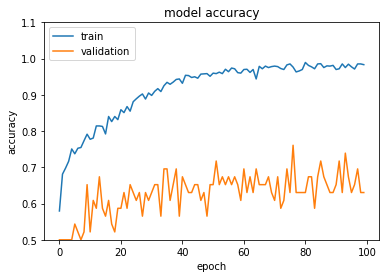

In [6]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.5,1.1])
plt.show()

2022-08-22 16:12:07.717241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


accuracy:  0.63
recall:  0.87
precision:  0.59


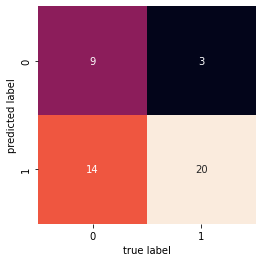

In [7]:
y_predd = model.predict(X_test)
y_pred = (y_predd>0.5).astype(int)

# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred.round()).round(2))
print('recall: ' , recall_score(y_test, y_pred.round()).round(2))
print('precision: ' , precision_score(y_test, y_pred.round()).round(2))

(0.0, 1.1)

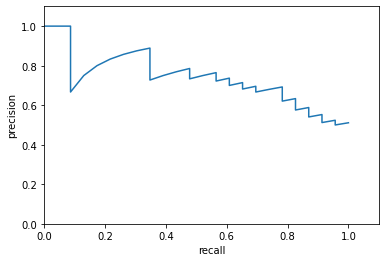

In [8]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predd)

plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.xlim([0,1.1])
plt.ylim([0,1.1])

In [35]:
vals = {160: 0.65,
250: 0.7,
500: 0.78,
1000: 0.85,
2000: 0.92,
4000: 0.98}

In [19]:
list(vals.values())

[0.7, 0.78, 0.85, 0.92, 0.98]

Text(0, 0.5, 'acuracy')

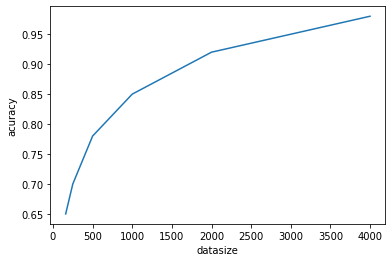

In [36]:
sns.lineplot(x=list(vals.keys()), y=list(vals.values()))
plt.xlabel('datasize')
plt.ylabel('acuracy')